# Midterm: Trees by Hand (Classification)
------------------------------------------------

**OPIM 5512: Data Science Using Python - University of Connecticut**

-------------------------------------------

Now, you will try to replicate what you saw with the 'Play Golf' dataset on a familiar dataset - CA Housing! But we will simplify the dataset a bit and give a few candidate columns for you to choose from and recode to a classification problem. **You are only going to use a Decision Tree Classifier with a depth of one and entropy as your split criterion.** Note that I have already recoded the target variable for you.

You will complete this assignment by HAND (your numbers should match what you can get with code - that's how you know you did it right!) **Make sure that you update the seed to your own student ID - this way each student gets different answers.**

For this assignment, please submit **only** a .pdf of your handwritten math. It should be clean, neatly organized, and easy to grade. Your name and netID should be in the top right corner and you should use page numbers on every page.

😟 This assignment is to be completed ON YOUR OWN - any plagiarism (i.e. direct copying codes, comments or submitting work that is not your own) will be dealt with according to UConn Graduate School policy.

## Rubric:
* **100 pts:** Student has a clearly labeled PDF with no errors. Your headers should match the class example, but the numbers and symbols should be updated to match your unique dataset. Calculations for splits should mimic the class example so be sure to check your work before submitting. To confirm your answer, you should plot the tree (like we do in class) with a max_depth=1 to ensure you got the same answer, but don't need to draw this by hand.
* **80 pts:** A minor error is carried throughout the notebook, lack of comments or headers, slightly messy presentation of calculations, and/or no decision tree visualization to check the work.
* **50 pts:** Major error, sloppy code and/or no decision tree visualization to check the work.

## Data Prep
Let's read in the CA Housing data and subset a few columns to make things more intuitive.



### Update the Seed!

In [43]:
# change this to your 7 digit studentID
theSeed = 2873641 # everybody will use a different value!

In [44]:
import pandas as pd
import numpy as np
# read in the CA Housing data
df = pd.read_csv('/content/sample_data/california_housing_train.csv')
df.info() # note that this version only has a few columns (RM, LSTAT, PTRATIO and MEDV)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


So that you don't have to evalaute ALL possible combinations - let's recode `housing_median_age`, `total_rooms` and `median_income` based on median values.

In [45]:
df = df[['housing_median_age', 'total_rooms', 'median_income', 'median_house_value']]

In [46]:
df['housing_median_age'] = np.where(df['housing_median_age'] > np.median(df['housing_median_age']), 1, 0)
df['total_rooms'] = np.where(df['total_rooms'] > np.median(df['total_rooms']), 1, 0)
df['median_income'] = np.where(df['median_income'] > np.median(df['median_income']), 1, 0)
df # we leave the target variable as is, we are doing regression!

,housing_median_age,total_rooms,median_income,median_house_value
0,0,1,0,66900.0
1,0,1,0,80100.0
2,0,0,0,85700.0
3,0,0,0,73400.0
4,0,0,0,65500.0
...,...,...,...,...
16995,1,1,0,111400.0
16996,1,1,0,79000.0
16997,0,1,0,103600.0
16998,0,1,0,85800.0


And we will recode the target variable to a classification problem.

In [47]:
df['median_house_value'] = np.where(df['median_house_value'] > np.median(df['median_house_value']), 1, 0)

This is where every student gets different datasets for modeling.

In [48]:
# sample 10 rows
df = df.sample(n=10, random_state=theSeed)

# clean up your dataframe
df.reset_index(inplace=True)
del df['index']

# check your work
df

,housing_median_age,total_rooms,median_income,median_house_value
0,0,1,1,1
1,0,1,1,1
2,1,1,0,0
3,1,1,1,1
4,0,1,0,0
5,0,1,0,0
6,1,1,1,1
7,0,1,0,0
8,1,0,0,1
9,0,1,1,1


In [49]:
#import matplotlib.pyplot as plt

In [50]:
def entropy_calculate(prob_list):

    entropy = 0
    for item in prob_list:
        entropy -= item * np.log2(item)
    return entropy

In [51]:
df['median_house_value'].value_counts()

1    6
0    4
Name: median_house_value, dtype: int64

# MODEL CODING
Decision Tree Classifier with a depth of one and entropy as your split criterion

#ENTROPY OF THE ENTIRE SYSTEM ( E=0.970,n=10 )
Entropy of the entire system,  E : 10 observations: 4 (0) and 6 (1) = 0.97

In [52]:
entropy_entire_F = -(4/10)*np.log2(4/10) - (6/10)*np.log2(6/10)
entropy_entire_F

0.9709505944546686

In [53]:
cases,counts = np.unique(df['median_house_value'] ,return_counts=True)
P = [count/len(df) for count in counts]
print('Probabilities of %s and %s are %.3f, %.3f respectively'%(cases[0],cases[1],P[0],P[1]))

entropy_entire = entropy_calculate(P)

print('Entire system entropy, E, is %.3f bits'%entropy_entire)

Probabilities of 0 and 1 are 0.400, 0.600 respectively
Entire system entropy, E, is 0.971 bits


# THE FIRST SPLIT CANDIDATES
To determine the best split, we will go through all of the columns one by one. For each column, we look at all the possible options for splitting.

We will consider:
* **`housing_median_age`**
* **`total_rooms`**
* **`median_income`**

All the columns have only 2 categories (0, 1)

##Housing_Median_Age

### *Cero* ($\epsilon = 1.000,n=6$)

In [54]:
### cero
cero_HMA = df.loc[df.housing_median_age == 0]
cero_HMA

,housing_median_age,total_rooms,median_income,median_house_value
0,0,1,1,1
1,0,1,1,1
4,0,1,0,0
5,0,1,0,0
7,0,1,0,0
9,0,1,1,1


In [55]:
cero_HMA_F = -(3/6)*np.log2(3/6) - (3/6)*np.log2(3/6)
cero_HMA_F

1.0

In [56]:
cases,counts = np.unique(cero_HMA["median_house_value"] ,return_counts=True)
print('cases:', cases)
print('counts:', counts)
P = [count/len(cero_HMA) for count in counts]
print('Probabilities of %s and %s are %.3f, %.3f respectively'%(cases[0],cases[1],P[0],P[1]))
entropy_cero_HMA = entropy_calculate(P)
print('cero_HMA entropy is %.3f bits'%entropy_cero_HMA)

cases: [0 1]
counts: [3 3]
Probabilities of 0 and 1 are 0.500, 0.500 respectively
cero_HMA entropy is 1.000 bits


### *One* ($\epsilon = 0.811,n=4$)

In [57]:
### One
one_HMA = df.loc[df.housing_median_age == 1]
one_HMA

,housing_median_age,total_rooms,median_income,median_house_value
2,1,1,0,0
3,1,1,1,1
6,1,1,1,1
8,1,0,0,1


In [58]:
one_HMA_F = -(1/4)*np.log2(1/4) - (3/4)*np.log2(3/4)
one_HMA_F

0.8112781244591328

In [67]:
cases,counts = np.unique(one_HMA["median_house_value"] ,return_counts=True)
print('cases:', cases)
print('counts:', counts)
P = [count/len(one_HMA) for count in counts]
print('Probabilities of %s and %s are %.3f, %.3f respectively'%(cases[0],cases[1],P[0],P[1]))
entropy_one_HMA = entropy_calculate(P)
print('one_HMA entropy is %.3f bits'%entropy_one_HMA)

cases: [0 1]
counts: [1 3]
Probabilities of 0 and 1 are 0.250, 0.750 respectively
one_HMA entropy is 0.811 bits


### Summary ($\text{IG} = 0.046$)

In [60]:
#total_entropy_housing_median_age
total_entropy_HMA = 1*(6/10)+0.811*(4/10)
print(total_entropy_HMA)
# information Gain
infogain_HMA = entropy_entire_F- total_entropy_HMA
infogain_HMA

0.9244


0.04655059445466858

##Total_Rooms

### *Cero* ($\epsilon = 0.000,n=1$)

In [61]:
### cero
cero_TR = df.loc[df.total_rooms == 0]
cero_TR

,housing_median_age,total_rooms,median_income,median_house_value
8,1,0,0,1


In [62]:
cero_TR_F = -(1/1)*np.log2(1/1)
cero_TR_F

-0.0

In [63]:
cases,counts = np.unique(cero_TR["median_house_value"] ,return_counts=True)
print('cases:', cases)
print('counts:', counts)
P = [count/len(cero_TR) for count in counts]
print('Probabilities of %s is %.3f'%(cases[0],P[0]))
entropy_cero_TR = entropy_calculate(P)
print('cero_TR entropy is %.3f bits'%entropy_cero_TR)

cases: [1]
counts: [1]
Probabilities of 1 is 1.000
cero_TR entropy is 0.000 bits


### *One* ($\epsilon = 0.991,n=9$)

In [64]:
### one
one_TR = df.loc[df.total_rooms == 1]
one_TR

,housing_median_age,total_rooms,median_income,median_house_value
0,0,1,1,1
1,0,1,1,1
2,1,1,0,0
3,1,1,1,1
4,0,1,0,0
5,0,1,0,0
6,1,1,1,1
7,0,1,0,0
9,0,1,1,1


In [68]:
one_TR_F = -(4/9)*np.log2(4/9) - (5/9)*np.log2(5/9)
one_TR_F

0.9910760598382222

In [69]:
cases,counts = np.unique(one_TR["median_house_value"] ,return_counts=True)
print('cases:', cases)
print('counts:', counts)
P = [count/len(one_TR) for count in counts]
print('Probabilities of %s and %s are %.3f, %.3f respectively'%(cases[0],cases[1],P[0],P[1]))
entropy_one_TR = entropy_calculate(P)
print('one_TR entropy is %.3f bits'%entropy_one_TR)

cases: [0 1]
counts: [4 5]
Probabilities of 0 and 1 are 0.444, 0.556 respectively
one_TR entropy is 0.991 bits


### Summary ($\text{IG} = 0.079$)

In [ ]:
#total_entropy_housing_median_age
total_entropy_TR = 0*(1/10)+0.991*(9/10)
print(total_entropy_TR)
# information Gain
infogain_TR = entropy_entire_F- total_entropy_TR
infogain_TR

0.8919


0.07905059445466855

##Median_Income

### *0* ($\epsilon = 0.722,n=5$)

In [ ]:
### cero
cero_MI = df.loc[df.median_income == 0]
cero_MI

,housing_median_age,total_rooms,median_income,median_house_value
2,1,1,0,0
4,0,1,0,0
5,0,1,0,0
7,0,1,0,0
8,1,0,0,1


In [ ]:
cero_MI_F = -(4/5)*np.log2(4/5) - (1/5)*np.log2(1/5)
cero_MI_F

0.7219280948873623

In [ ]:
cases,counts = np.unique(cero_MI["median_house_value"] ,return_counts=True)
print('cases:', cases)
print('counts:', counts)
P = [count/len(cero_MI) for count in counts]
print('Probabilities of %s and %s are %.3f, %.3f respectively'%(cases[0],cases[1],P[0],P[1]))
entropy_cero_MI = entropy_calculate(P)
print('cero_MI entropy is %.3f bits'%entropy_cero_MI)

cases: [0 1]
counts: [4 1]
Probabilities of 0 and 1 are 0.800, 0.200 respectively
cero_MI entropy is 0.722 bits


### *1* ($\epsilon = 0.000,n=5$)

In [ ]:
one_MI = df.loc[df.median_income == 1]
one_MI

,housing_median_age,total_rooms,median_income,median_house_value
0,0,1,1,1
1,0,1,1,1
3,1,1,1,1
6,1,1,1,1
9,0,1,1,1


In [ ]:
one_MI_F = -(5/5)*np.log2(5/5)
one_MI_F

-0.0

In [ ]:
cases,counts = np.unique(one_MI["median_house_value"] ,return_counts=True)
print('cases:', cases)
print('counts:', counts)
P = [count/len(one_MI) for count in counts]
print('Probabilities of %s is %.3f'%(cases[0],P[0]))
entropy_one_MI = entropy_calculate(P)
print('one_MI entropy is %.3f bits'%entropy_one_MI)

cases: [1]
counts: [5]
Probabilities of 1 is 1.000
one_MI entropy is 0.000 bits


###Summary ($\text{IG} = 0.610$)

In [ ]:
#total_entropy_housing_median_age
total_entropy_MI = 0.722*(5/10)+0*(5/10)
print(total_entropy_MI)
# information Gain
infogain_MI = entropy_entire_F- total_entropy_MI
infogain_MI

0.361


0.6099505944546686

In [ ]:
# don't forget the viz at the end to check your work - all  the numbers should match!
# good luck! and make sure you are organized...

# Don't forget the viz at the end to check your work - all  the numbers should match!
Good luck! and make sure you are organized...

## And the first split is... `Median_Income`!
Why `median_income`? It has the largest Information Gain, $\epsilon = 0.610$.

So this tells us it is the best candidate to split the data.

### Visualization of the first-split tree
As shown above, by choosing median_income as the first decision/question, the highest reduction in entropy/randomness is achieved that corresponds to the highest Information Gain

In [ ]:
df.columns

Index(['housing_median_age', 'total_rooms', 'median_income',
       'median_house_value'],
      dtype='object')

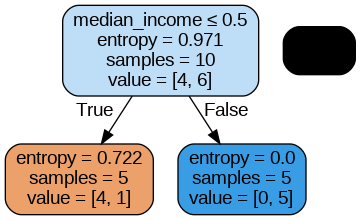

In [ ]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

df['housing_median_age'] = Le.fit_transform(df['housing_median_age'])
df['total_rooms'] = Le.fit_transform(df['total_rooms'])
df['cccmedian_income'] = Le.fit_transform(df['median_income'])

y = df['median_house_value']
X = df[['housing_median_age','total_rooms','median_income']]

# Fitting the model
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion = 'entropy',max_leaf_nodes=2)
clf = clf.fit(X, y)

from sklearn.tree import export_graphviz
from six import StringIO #updated
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf,  # this is the name of your model!
                out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,
                feature_names=X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())